# Calculate average intensity difference in FSL FLIRT output and total number of mismatches in each output from FSL FIRST

In this Jupyter notebook, we will be analysing dissimilarity between two sets of neuroimaging volumes:
- Voxel-wise average intensity difference in FSL FLIRT output.
- Total number of mismatches in each output from FSL FIRST.

The pipeline will include a plot of dissimilarity heatmap in glass brain and a scatterplot of correlation between average intensity difference and number of mismatches.

## Inputs
- Two directories containing neuroimaging volumes (source_dir, target_dir)

## Outputs
- Average intensity difference of all subjects: **'intensity_diff_subcortical.nii'**
- Total number of mismatches: **'mean_mismatch.csv'**
- Heatmap plot for the dissimilarity in glass brain
- Scatterplot of correlation 

## Notebook Workflow
1. Iterate through each outputs from FLIRT, FIRST
2. Get all files from the two directories and check if they have the same list of subjects
3. Calculate the average intensity difference and total number of mismatches and store in **'intensity_diff_subcortical.nii'** and **'mean_mismatch.csv'**
4. Generate plot 

To run the code on your local machine, please follow these steps:
1. Replace the string "PATH_TO_IMAGE_DIR1", "PATH_TO_IMAGE_DIR2" and "PATH_TO_OUTPUT_DIR" with the actual paths to the source and target directories and the working directory on your machine. 
2. Replace "PATH_TO_IMAGE_DIR1" and "PATH_TO_IMAGE_DIR2" with your suitable directories of images to compare.
5. Once the code has completed running, the user can find the output files in the same directory where the code runs.

In [1]:
!pip install nilearn seaborn

In [2]:
import numpy as np
import nibabel as nb
import seaborn as sns
import pandas as pd
from scipy.stats.stats import pearsonr
import os, glob
from nilearn.image import resample_img
from nilearn.datasets import load_mni152_template
from nilearn import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker

/tmp/ipykernel_7566/3463690991.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


## Plot heatmap of average intensity difference

/home/thuy/.local/lib/python3.8/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


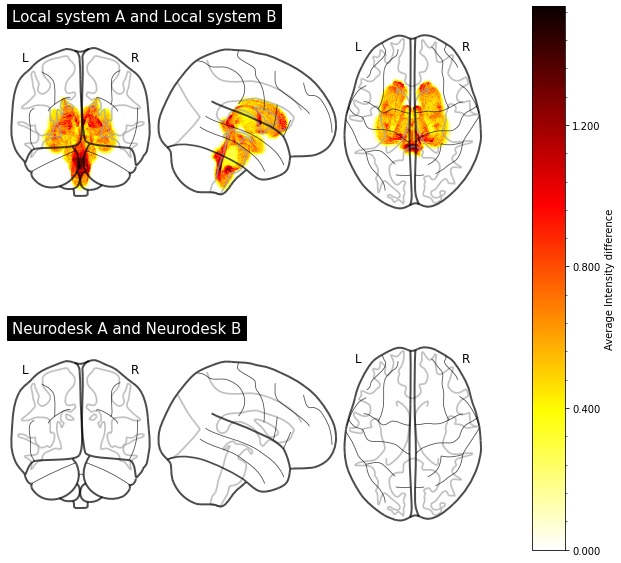

In [3]:
F = plt.figure()
F.set_figheight(10)
F.set_figwidth(10)
F.patch.set_facecolor('white')

def major_formatter(x, pos):
    return f'{x:.3f}'

ax1 = plt.subplot2grid(shape=(35, 14), loc=(0, 0), colspan=12, rowspan=15)
ax1.axis("off")
ax2 = plt.subplot2grid(shape=(35, 14), loc=(20, 0), colspan=12, rowspan=15)
ax2.axis("off")

stat_img = nb.load('./data/intensity_diff_local.nii')
stat_nii = np.array(stat_img.get_fdata(), dtype=np.float32)

stat_img_neuro = nb.load('./data/intensity_diff_neuro.nii')
stat_nii_neuro = np.array(stat_img_neuro.get_fdata(), dtype=np.float32)
plotting.plot_glass_brain(stat_img, axes=ax1, vmin=np.min(stat_nii[np.nonzero(stat_nii)]), vmax=np.amax(stat_nii), title="Local system A and Local system B")
plotting.plot_glass_brain(stat_img_neuro, axes=ax2,vmin=np.min(stat_nii[np.nonzero(stat_nii)]), vmax=np.amax(stat_nii), title="Neurodesk A and Neurodesk B")

ax3 = plt.subplot2grid(shape=(35, 14), loc=(0, 13), colspan=1, rowspan=35)

norma_diff = mpl.colors.Normalize(vmin=np.min(stat_nii_neuro[np.nonzero(stat_nii)]), vmax=np.amax(stat_nii))
cb = mpl.colorbar.ColorbarBase(ax3, cmap=mpl.cm.get_cmap('hot_r'),
                                    norm=norma_diff,
                                    orientation='vertical')

cb.set_label('Average Intensity difference')
ax3.yaxis.set_major_formatter(major_formatter)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))
ax3.yaxis.set_minor_locator(plt.MaxNLocator(20))
plotting.show()

## Scatterplot of correlation between average intensity difference and number of mismatches

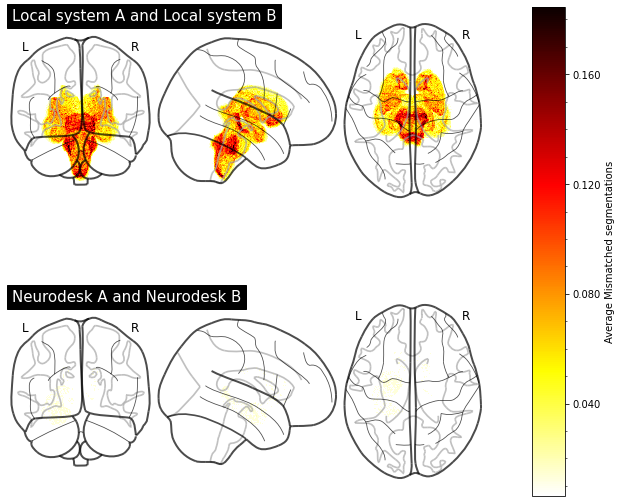

In [5]:
F = plt.figure()
F.set_figheight(9)
F.set_figwidth(10)
F.patch.set_facecolor('white')

def major_formatter(x, pos):
    return f'{x:.3f}'

ax1 = plt.subplot2grid(shape=(35, 14), loc=(0, 0), colspan=12, rowspan=15)
ax1.axis("off")
ax2 = plt.subplot2grid(shape=(35, 14), loc=(20, 0), colspan=12, rowspan=15)
ax2.axis("off")
# f, axes = plt.subplots(2, 20, figsize=(10, 5))
stat_img = nb.load('./data/mismatch_local.nii')
stat_nii = np.array(stat_img.get_fdata(), dtype=np.float32)
stat_img_neuro = nb.load('./data/mismatch_neuro.nii')
stat_nii_neuro = np.array(stat_img_neuro.get_fdata(), dtype=np.float32)
plotting.plot_glass_brain(stat_img, axes=ax1, vmin=np.min(stat_nii[np.nonzero(stat_nii)]), vmax=np.amax(stat_nii), title="Local system A and Local system B")
plotting.plot_glass_brain(stat_img_neuro, axes=ax2, vmin=np.min(stat_nii[np.nonzero(stat_nii)]), vmax=np.amax(stat_nii), title="Neurodesk A and Neurodesk B")

ax3 = plt.subplot2grid(shape=(35, 14), loc=(0, 13), colspan=1, rowspan=35)

# norma = mpl.colors.Normalize(vmin=0.97, vmax=1)
norma_diff = mpl.colors.Normalize(vmin=np.min(stat_nii[np.nonzero(stat_nii)]), vmax=np.amax(stat_nii))
cb = mpl.colorbar.ColorbarBase(ax3, cmap=mpl.cm.get_cmap('hot_r'),
                                    norm=norma_diff,
                                    orientation='vertical')
display
cb.set_label('Average Mismatched segmentations')
ax3.yaxis.set_major_formatter(major_formatter)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))
ax3.yaxis.set_minor_locator(plt.MaxNLocator(20))
plotting.show()

/home/thuy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


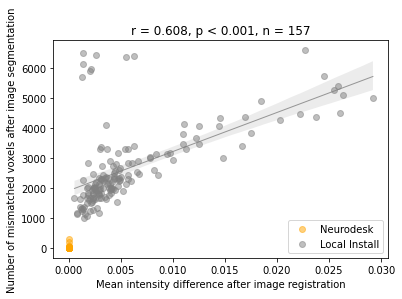

In [4]:
df_neuro = pd.read_csv('./data/mismatch_intensity_neurodesk.csv')
stat_neuro = pearsonr(df_neuro['intdiff'], df_neuro['mismatch'])

df_local = pd.read_csv('./data/mismatch_intensity_local.csv')
stat = pearsonr(df_local['intdiff'], df_local['mismatch'])

sns.regplot(x=df_neuro['intdiff'], y=df_neuro['mismatch'], line_kws={"color":"orange","alpha":0.8,"lw":1}, scatter_kws={"color":"orange",'alpha':0.5}, label='Neurodesk')
sns.regplot(x=df_local['intdiff'], y=df_local['mismatch'], line_kws={"color":"grey","alpha":0.8,"lw":1}, scatter_kws={"color":"grey",'alpha':0.5}, label='Local Install')
plt.xlabel("Mean intensity difference after image registration")

plt.ylabel("Number of mismatched voxels after image segmentation")
plt.title(f"r = {stat[0]:.3f}, p < 0.001, n = {len(df_local)}")
plt.legend(loc='lower right')

## If you have **your own data to compare**, execute the cell below and specify the directories for images to calculate the total mismatch and average intensity difference between the two sets of images.

In [ ]:
def save_nii(data, file_path, nii_like):
    nb.save(nb.nifti1.Nifti1Image(data, affine=nii_like.affine, header=nii_like.header), file_path)

def find_mismatch(flirts1, flirts2, firsts1, firsts2):
    stack_diff = []
    f_name = 'mismatch_intensity.csv'

    f = open(os.path.join(os.getcwd(), f_name), 'w', encoding='utf-8')
    f.write('mismatch,intdiff\n')
    for flirt1, flirt2, first1, first2 in zip(flirts1, flirts2, firsts1, firsts2):
        first_local = nb.load(first1)
        first_hpc = nb.load(first2)

        mismatch = np.zeros(first_local.shape)
        seg1 = np.asanyarray(first_hpc.dataobj).astype(int)
        seg1[np.isnan(seg1)] = 0
        seg2 = np.asanyarray(first_local.dataobj).astype(int)
        seg2[np.isnan(seg2)] = 0
        mismatch[seg1!=seg2] = 1
        
        mismatch_cnt = np.sum(mismatch)

        flirt_hpc = nb.load(flirt1)
        flirt_local = nb.load(flirt2)

        data1 = np.asanyarray(flirt_hpc.dataobj).astype(int)
        data1[np.logical_and(seg1==0, seg2==0)] = 0
        data2 = np.asanyarray(flirt_local.dataobj).astype(int)
        data2[np.logical_and(seg1==0, seg2==0)] = 0

        difference = np.mean(np.abs(data1-data2))

        line = [mismatch_cnt, difference]
        line = ",".join([str(x) for x in line])
        f.write(line)
        f.write('\n')
    f.close()

def subcortical_diff(flirts1, flirts2, firsts1, firsts2):
    mni = load_mni152_template(1)

    template = np.asanyarray(mni.dataobj)
    template_dim = template.shape

    stacked_intensity_diff = []

    for flirt1, flirt2, first1, first2 in zip(flirts1, flirts2, firsts1, firsts2):

        first_local = nb.load(first1)
        first_hpc = nb.load(first2)

        zoom_first = first_local.header.get_zooms()
        target_affine_first = nb.affines.rescale_affine(first_local.affine,first_local.get_fdata().shape,zooms=zoom_first,new_shape=template_dim)

        first_local = resample_img(first_local, target_affine=target_affine_first,target_shape=template_dim)
        first_hpc = resample_img(first_hpc, target_affine=target_affine_first,target_shape=template_dim)
        
        seg1 = np.asanyarray(first_hpc.dataobj).astype(int)
        seg1[np.isnan(seg1)] = 0
        seg2 = np.asanyarray(first_local.dataobj).astype(int)
        seg2[np.isnan(seg2)] = 0

        nii1 = nb.load(flirt1)
        nii2 = nb.load(flirt2)

        zoom = nii1.header.get_zooms()
        target_affine = nb.affines.rescale_affine(nii1.affine,nii1.get_fdata().shape,zooms=zoom,new_shape=template_dim)

        nii1 = resample_img(nii1, target_affine=target_affine,target_shape=template_dim)
        nii2 = resample_img(nii2, target_affine=target_affine,target_shape=template_dim)

        data1 = np.asanyarray(nii1.dataobj).astype(int)
        data1[np.logical_and(seg1==0, seg2==0)] = 0

        data2 = np.asanyarray(nii2.dataobj).astype(int)
        data2[np.logical_and(seg1==0, seg2==0)] = 0

        data1 = np.pad(data1, ((0,np.abs(template_dim[0] - data1.shape[0])), (0,np.abs(template_dim[1] - data1.shape[1])), (0,np.abs(template_dim[2] - data1.shape[2]))), 'constant', constant_values=0)
        data2 = np.pad(data2, ((0,np.abs(template_dim[0] - data2.shape[0])), (0,np.abs(template_dim[1] - data2.shape[1])), (0,np.abs(template_dim[2] - data2.shape[2]))), 'constant', constant_values=0)

        data1 = data1[:template_dim[0]:, :template_dim[1]:, :template_dim[2]:]
        data2 = data2[:template_dim[0]:, :template_dim[1]:, :template_dim[2]:]

        intensity_diff = np.abs(data2 - data1)
        stacked_intensity_diff.append(intensity_diff)

    stacked_intensity_diff = np.stack(stacked_intensity_diff, -1)

    stacked_intensity_diff= np.sum(stacked_intensity_diff,axis=-1)/len(flirts1)
    diff_path = os.path.join(os.getcwd(),  "intensity_diff.nii")
 
    save_nii(stacked_intensity_diff, diff_path, mni)
    return diff_path

In [ ]:
PATH_TO_IMAGE_DIR1 = ''
PATH_TO_IMAGE_DIR2 = ''

flirt = 'to_std_sub.nii.gz'
flirts1 = sorted(glob.glob(os.path.join(PATH_TO_IMAGE_DIR1, '*' + flirt)))
flirts2 = sorted(glob.glob(os.path.join(PATH_TO_IMAGE_DIR2, '*' + flirt)))

first = 'firstseg_mni.nii.gz'
firsts1 = sorted(glob.glob(os.path.join(PATH_TO_IMAGE_DIR1, '*' + first)))
firsts2 = sorted(glob.glob(os.path.join(PATH_TO_IMAGE_DIR2, '*' + first)))

find_mismatch(flirts1, flirts2, firsts1, firsts2)
subcortical_diff(flirts1, flirts2, firsts1, firsts2)